In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats
from collections import Counter
from scipy.stats import mannwhitneyu

/home/disk/orca/csmall3/anaconda3/envs/new_2025_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Objective
This notebook plots the violin plots for the max instantaneous ERM in both an aggregate and seasonal (somewhat subjective sense) for the updated and final ARs

In [11]:
#bring in the data we need
non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_Non_MJO_ARs_UPDATE.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

mjo_act_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Active_ARs_UPDATE.csv')
mjo_act_og = mjo_act_og.drop(columns=['Unnamed: 0'])
mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Connected_ARs_UPDATE.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

## Overall

In [12]:
non_mjo_erm = np.array(non_mjo_og['Max ERM'])
mjo_act_erm = np.array(mjo_act_og['Max ERM'])
mjo_erm = np.array(mjo_og['Max ERM'])

In [13]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

1.0326711014068362
3.918833732604981
0.106395237147808
0.8555564033276447


In [14]:
print(mjo_act_erm.mean())
print(mjo_act_erm.max())
print(mjo_act_erm.min())
print(np.median(mjo_act_erm))

1.1937009456640852
5.356252670288086
0.0
1.020674705505371


In [15]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

1.2211361707054416
5.038845169932884
0.106395237147808
1.0558161735534668


In [7]:
print(len(non_mjo_erm))
print(len(mjo_act_erm))
print(len(mjo_erm))

312
580
257


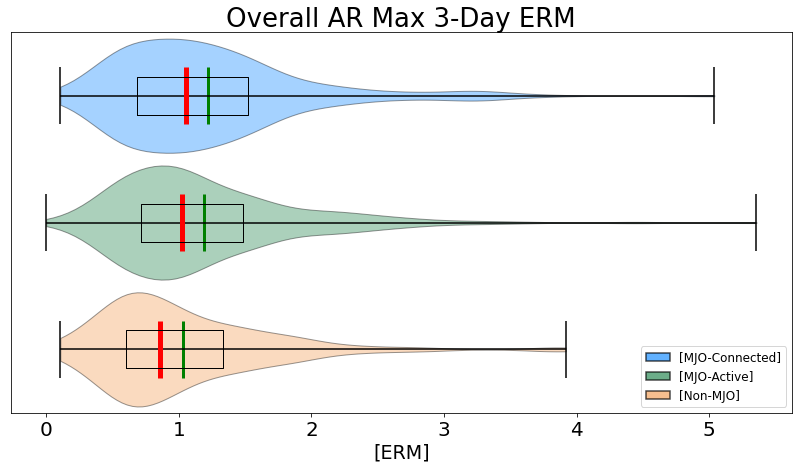

In [8]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]
type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('Overall AR Max 3-Day ERM', fontsize=titlesize)
ax.set_xlabel('[ERM]', fontsize=legendsize)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/JGR_Man_Scripts/AR_Stats/Figures/Overall_ERM.png", dpi=350, bbox_inches='tight')
plt.show()

In [9]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)
stat, p_value = shapiro(mjo_act_erm)
print(p_value)
stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

1.5870498990679203e-16
5.583419152505982e-22
5.171037209539264e-14


In [10]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='less')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='less')
print(p_value)
# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)


5.4607932089297226e-05
0.5090334687706544
0.00015190549309930724
2.7303966044648613e-05
0.2545167343853272
7.595274654965362e-05


## DJFM


In [16]:
#bring in the data we need
non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_Non_MJO_ARs_UPDATE.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

mjo_act_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Active_ARs_UPDATE.csv')
mjo_act_og = mjo_act_og.drop(columns=['Unnamed: 0'])
mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Connected_ARs_UPDATE.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

In [17]:
#mjo not active

dec=non_mjo_og[non_mjo_og['Month'] == 12]
jan=non_mjo_og[non_mjo_og['Month'] == 1]
feb=non_mjo_og[non_mjo_og['Month'] == 2]
mar=non_mjo_og[non_mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

non_mjo_erm = np.array(CA_non_DJF['Max ERM'])

#mjo active

dec=mjo_act_og[mjo_act_og['Month'] == 12]
jan=mjo_act_og[mjo_act_og['Month'] == 1]
feb=mjo_act_og[mjo_act_og['Month'] == 2]
mar=mjo_act_og[mjo_act_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_act_erm = np.array(CA_non_DJF['Max ERM'])

#mjo connected
dec=mjo_og[mjo_og['Month'] == 12]
jan=mjo_og[mjo_og['Month'] == 1]
feb=mjo_og[mjo_og['Month'] == 2]
mar=mjo_og[mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_erm = np.array(CA_non_DJF['Max ERM'])

In [18]:
print(len(non_mjo_erm))
print(len(mjo_act_erm))
print(len(mjo_erm))

42
315
105


In [19]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

1.125050199780383
2.657752159075148
0.3492537140846252
0.9222475693197938


In [20]:
print(mjo_act_erm.mean())
print(mjo_act_erm.max())
print(mjo_act_erm.min())
print(np.median(mjo_act_erm))

1.3267690966668377
5.356252670288086
0.2574508488178253
1.105431318283081


In [21]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

1.5129480651556637
5.038845169932884
0.438557356595993
1.321982741355896


In [22]:
print(non_mjo_erm.shape)
print(mjo_act_erm.shape)
print(mjo_erm.shape)

(42,)
(315,)
(105,)


In [20]:
non_mjo_erm.flatten().shape

(42,)

In [8]:
mjo_erm

array([0.97011107, 1.44725442, 0.63005942, 3.23789549, 2.76550317,
       0.74907219, 0.47345987, 1.32198274, 1.30245352, 0.5177573 ,
       1.26699245, 1.69949734, 2.44839263, 1.02688003, 2.0693595 ,
       1.70272461, 1.6258485 , 0.63417435, 2.65407847, 1.13378142,
       1.13378142, 0.82655718, 0.66440178, 0.74036855, 2.25231171,
       1.19242327, 1.51913393, 1.12468982, 1.33285601, 5.03884517,
       2.02630564, 1.44774318, 3.08027434, 1.3348105 , 0.7707848 ,
       0.62068403, 1.41053629, 2.21170378, 3.22403363, 2.16547649,
       1.62828933, 1.35592294, 2.25231171, 1.55129193, 1.37445224,
       3.23789549, 2.01742887, 1.23953724, 1.65390217, 0.92890728,
       0.93124151, 0.51301497, 0.43855736, 1.47984093, 3.5314685 ,
       3.33782874, 1.19496625, 1.58578921, 1.66513896, 1.25487196,
       1.66513896, 0.65615094, 1.99878907, 1.5782479 , 3.12879658,
       1.77989237, 1.34005816, 0.57984996, 1.27482391, 1.61480057,
       2.42066576, 1.23953724, 1.        , 3.21834803, 0.82112

In [23]:
flood_thres = 1.5
sig_flood_thres = 3
ext_flood_thres = 5

non_mjo_flood = np.sum(non_mjo_erm > flood_thres)
mjo_act_flood = np.sum(mjo_act_erm > flood_thres)
mjo_conn_flood = np.sum(mjo_erm > flood_thres)

non_mjo_sig = np.sum(non_mjo_erm > sig_flood_thres)
mjo_act_sig = np.sum(mjo_act_erm > sig_flood_thres)
mjo_conn_sig = np.sum(mjo_erm > sig_flood_thres)

non_mjo_ext = np.sum(non_mjo_erm > ext_flood_thres)
mjo_act_ext = np.sum(mjo_act_erm > ext_flood_thres)
mjo_conn_ext = np.sum(mjo_erm > ext_flood_thres)


print(f"Non-MJO ARs above ERM of {flood_thres}: {non_mjo_flood}")
print(f"MJO-Active ARs above ERM of {flood_thres}: {mjo_act_flood}")
print(f"MJO-Connected ARs above ERM of {flood_thres}: {mjo_conn_flood}")

print(f"Non-MJO ARs above ERM of {sig_flood_thres}: {non_mjo_sig}")
print(f"MJO-Active ARs above ERM of {sig_flood_thres}: {mjo_act_sig}")
print(f"MJO-Connected ARs above ERM of {sig_flood_thres}: {mjo_conn_sig}")

print(f"Non-MJO ARs above ERM of {ext_flood_thres}: {non_mjo_ext}")
print(f"MJO-Active ARs above ERM of {ext_flood_thres}: {mjo_act_ext}")
print(f"MJO-Connected ARs above ERM of {ext_flood_thres}: {mjo_conn_ext}")

#do these as percentages so it's more impactful

Non-MJO ARs above ERM of 1.5: 10
MJO-Active ARs above ERM of 1.5: 95
MJO-Connected ARs above ERM of 1.5: 42
Non-MJO ARs above ERM of 3: 0
MJO-Active ARs above ERM of 3: 12
MJO-Connected ARs above ERM of 3: 10
Non-MJO ARs above ERM of 5: 0
MJO-Active ARs above ERM of 5: 2
MJO-Connected ARs above ERM of 5: 1


In [24]:
for i, arr in enumerate([non_mjo_erm, mjo_act_erm, mjo_erm]):
    print(f"Item {i}: type = {type(arr)}, dtype = {getattr(arr, 'dtype', 'N/A')}, shape = {np.shape(arr)}")


Item 0: type = <class 'numpy.ndarray'>, dtype = float64, shape = (42,)
Item 1: type = <class 'numpy.ndarray'>, dtype = float64, shape = (315,)
Item 2: type = <class 'numpy.ndarray'>, dtype = float64, shape = (105,)


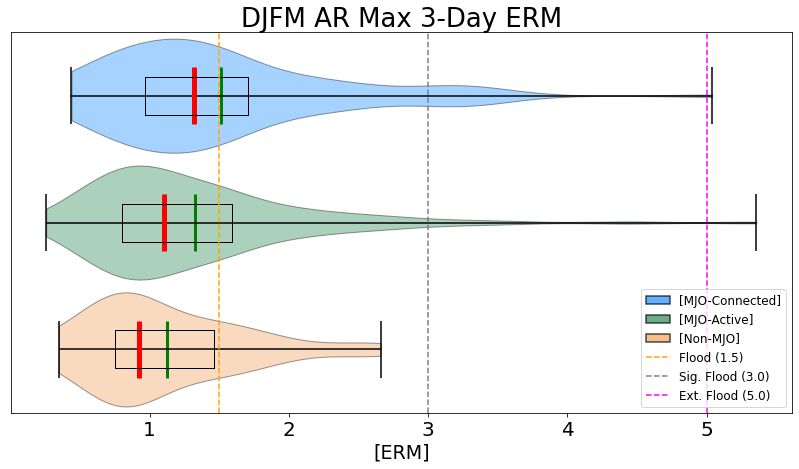

In [13]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]
# data_area = [np.asarray(x).astype(float).flatten() for x in [non_mjo_erm, mjo_act_erm, mjo_erm]]

type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

# Example vertical line positions
vline_positions = [1.5, 3, 5]
vline_colors = ['orange', 'gray', 'magenta']
vline_labels = ['Flood (1.5)', 'Sig. Flood (3.0)', 'Ext. Flood (5.0)']

# Draw vertical lines
for pos, color in zip(vline_positions, vline_colors):
    ax.axvline(x=pos, color=color, linestyle='--', linewidth=1.5)
    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]

# Create proxy lines for the vertical lines
vline_proxies = [Line2D([0], [0], color=color, linestyle='--', linewidth=1.5) for color in vline_colors]

# Combine and reverse the legend items as needed
combined_handles = legend_patches[::-1] + vline_proxies
combined_labels = type_labels[::-1] + vline_labels

# ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
ax.legend(combined_handles, combined_labels, loc='lower right', fontsize=12)
    
ax.set_title('DJFM AR Max 3-Day ERM', fontsize=titlesize)
ax.set_xlabel('[ERM]', fontsize=legendsize)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/JGR_Man_Scripts/AR_Stats/Figures/DJFM_ERM.png", dpi=350, bbox_inches='tight')
plt.show()

Publication Version

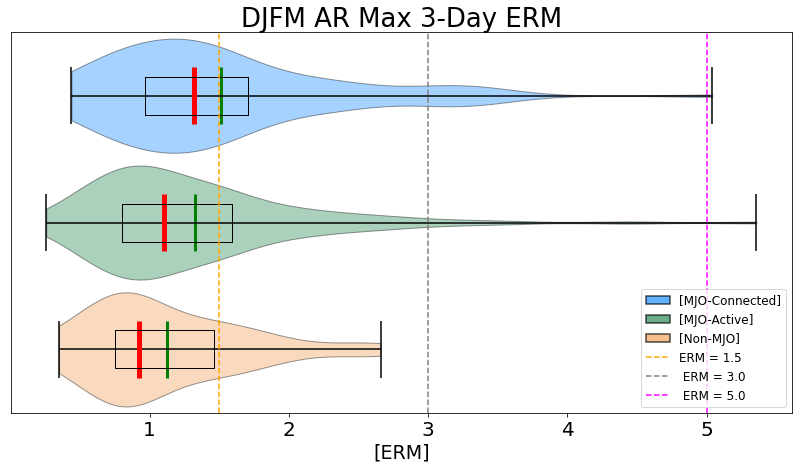

In [25]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]

type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']


colors = ['sandybrown','seagreen','dodgerblue']

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)


# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

# Example vertical line positions
vline_positions = [1.5, 3, 5]
vline_colors = ['orange', 'gray', 'magenta']
vline_labels = ['ERM = 1.5', ' ERM = 3.0', ' ERM = 5.0']

# Draw vertical lines
for pos, color in zip(vline_positions, vline_colors):
    ax.axvline(x=pos, color=color, linestyle='--', linewidth=1.5)
    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]

# Create proxy lines for the vertical lines
vline_proxies = [Line2D([0], [0], color=color, linestyle='--', linewidth=1.5) for color in vline_colors]

# Combine and reverse the legend items as needed
combined_handles = legend_patches[::-1] + vline_proxies
combined_labels = type_labels[::-1] + vline_labels

ax.legend(combined_handles, combined_labels, loc='lower right', fontsize=12)
    
ax.set_title('DJFM AR Max 3-Day ERM', fontsize=titlesize)
ax.set_xlabel('[ERM]', fontsize=legendsize)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/JGR_Man_Scripts/AR_Stats/Figures/DJFM_ERM_UPDATE_2025_07_18.png", dpi=350, bbox_inches='tight')
plt.show()

In [12]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)
stat, p_value = shapiro(mjo_act_erm)
print(p_value)
stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

0.0011940511176362634
2.6896991918300923e-17
9.274035761563937e-08


In [11]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='less')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='less')
print(p_value)
# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

# All statistically different from one another (the only caveat is that for a two sided test, we're just on the border for Non-MJO and MJO-Active)
#I think DJFM is still the best way to go even though it doesn't differ much from DJF because there's just more ARs available for analysis!!!

0.11451915981390047
0.016616717636737475
0.005388427424895003
0.057259579906950235
0.008308358818368737
0.0026942137124475016
